# PUI midterm

## Part 1: Multiple choice and theoretic questions
Please write and explain your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

Answer: C)D) sample averages are different as Ttest is taken for comparing averages of sets of values so if the p value is 0.04,there is statistically significant chance that the sample averages will be different and one can reject the null hypothesis with 95% confidence level.

### Question 2. What is true regarding normal and log-normal distributions (select all that applies):
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

Answer: A) The log normal distribution is skewed to the positive side so there is a greater probability of inclusion of outliers.
D) the log normal distribution is made of logarithm of values of the distribution, so when we apply logarithm to the log values the distribution becomes normal.

### Question 3. 
Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical
(repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

Answer: Semi - Supervised learning : if we have enough sample data of the minor deviations we can build a better model through the training data and better understand the test data with this output. Since there is loads of satellite imagery data collected over the time training a Semi Supervised model might be the efficient method.

### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

Answer: When an unknown data is added to the model we need to analyse the output of the model to the test, training and validation samples to check whether the model is overfitted or underfitted and how it performs with other unknown data. That is why it is important to seperate training, test and validation samples.

IN very large urban data sets a validation sample is required to effciently analyse the output data, tune parameters for the training set and also check accuracy of the model. It is also useful to check the overfitting of the model which can be tuned to the validation set.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 2: NYPD data analysis

In this part, you need to download New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

###  download NYPD complaints data:
two options:
1. download with curl or urllib methods
2. download with API

you can also manually download here: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
# !curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

In [3]:
# !wget https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD

In [4]:
# !wget https://www.dropbox.com/s/u78fk8g0wkf3xwu/NYPD_data.csv?dl=0

### read data

In [5]:
data = pd.read_csv('D:/Shantanu/NYU CUSP/PUI/midterm-shantanu1000-main/NYPD_data.csv')
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D


In [6]:
data.shape

(7825499, 35)

In [7]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

The complete data dictionary is here: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf. 

The focus of this notebook would be on following columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [8]:
# code here 
# make sure to convert date column to datetime
columns_for = ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude']
data_mid = pd.DataFrame(data, columns = columns_for)
data_mid.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude
0,506547392,03/29/2018,20:30:00,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,NaN,40.810877,-73.941064
1,629632833,02/06/2018,23:15:00,PETIT LARCENY,BRONX,NaN,40.873671,-73.908014
2,787203902,11/21/2018,00:15:00,PETIT LARCENY,BROOKLYN,NaN,40.651782,-73.885457
3,280364018,06/09/2018,21:42:00,OFF. AGNST PUB ORD SENSBLTY &,MANHATTAN,NaN,40.759310,-73.994706
4,985800320,11/10/2018,19:40:00,PETIT LARCENY,MANHATTAN,NaN,40.764536,-73.970728


In [9]:
data_mid['CMPLNT_FR_DT'] = pd.to_datetime(data_mid['CMPLNT_FR_DT'], errors= 'coerce')
data_mid.isnull().sum()

CMPLNT_NUM            0
CMPLNT_FR_DT        789
CMPLNT_FR_TM         48
OFNS_DESC         18832
BORO_NM           12480
PARKS_NM        7794644
Latitude          17339
Longitude         17339
dtype: int64

In [10]:
data_mid = data_mid.dropna(subset =['CMPLNT_FR_DT','CMPLNT_FR_TM','BORO_NM'])
data_mid.isnull().sum()

CMPLNT_NUM            0
CMPLNT_FR_DT          0
CMPLNT_FR_TM          0
OFNS_DESC         18803
BORO_NM               0
PARKS_NM        7781336
Latitude          16875
Longitude         16875
dtype: int64

In [11]:
data_mid = data_mid.drop_duplicates(subset =['CMPLNT_NUM'])
data_mid.isnull().sum()

CMPLNT_NUM            0
CMPLNT_FR_DT          0
CMPLNT_FR_TM          0
OFNS_DESC         18798
BORO_NM               0
PARKS_NM        7777410
Latitude          16875
Longitude         16875
dtype: int64

### 2. Remove rows where location is parks or greenspace and keep rows for 2019 and after

In [12]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN
print(data_mid.shape)
data_mid = data_mid[data_mid['PARKS_NM'].isnull()]
print(data_mid.shape)

(7808233, 8)
(7777410, 8)


In [13]:
## check the timeline of data
print(data_mid['CMPLNT_FR_DT'].min())
print(data_mid['CMPLNT_FR_DT'].max())

1900-03-10 00:00:00
2021-12-31 00:00:00


In [14]:
# remove data <2019
data_mid['Year'] = data_mid['CMPLNT_FR_DT'].dt.year

data_mid = data_mid[data_mid['Year']>=2019]
data_mid.shape


(1297955, 9)

### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [15]:
data_mid['OFNS_DESC'].unique()

array(['MISCELLANEOUS PENAL LAW', 'HARRASSMENT 2', 'FELONY ASSAULT',
       'ARSON', 'FORGERY', 'GRAND LARCENY', 'PETIT LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'ASSAULT 3 & RELATED OFFENSES',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OTHER STATE LAWS (NON PENAL LA', 'BURGLARY', 'ROBBERY',
       'DANGEROUS WEAPONS', 'CRIMINAL MISCHIEF & RELATED OF',
       'THEFT-FRAUD', 'VEHICLE AND TRAFFIC LAWS', 'DANGEROUS DRUGS',
       'SEX CRIMES', 'OFF. AGNST PUB ORD SENSBLTY &', 'RAPE',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'CRIMINAL TRESPASS', 'POSSESSION OF STOLEN PROPERTY',
       'UNAUTHORIZED USE OF A VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
       'ENDAN WELFARE INCOMP', 'PETIT LARCENY OF MOTOR VEHICLE',
       'NYS LAWS-UNCLASSIFIED FELONY',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'KIDNAPPING & RELATED OFFENSES', 'FRAUDULENT ACCOSTING',
       "B

In [16]:
DF_2 = data_mid.loc[data_mid['OFNS_DESC'].isin(['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'])]
DF_2['OFNS_DESC'].unique()                  

array(['FELONY ASSAULT', 'ARSON', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'BURGLARY', 'ROBBERY', 'RAPE'],
      dtype=object)

In [17]:
DF_2.shape

(287016, 9)

### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [18]:
## zip codes map
zips = gpd.read_file('D:/Shantanu/NYU CUSP/PUI/midterm-shantanu1000-main/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [19]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<AxesSubplot:>

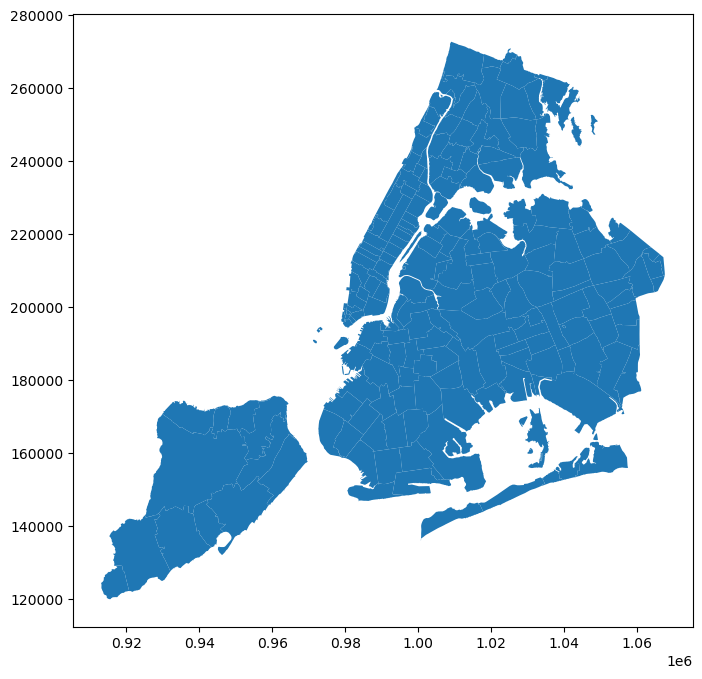

In [20]:
zips.plot(figsize=(8,8))

In [21]:
geometry = [Point(xy) for xy in zip(DF_2.Longitude, DF_2.Latitude)]

geoDF_2 = gpd.GeoDataFrame(DF_2,geometry=geometry,crs={'init': 'epsg:4326'})

zips1 = zips
zips.crs


<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
DF_NYPD = gpd.sjoin(geoDF_2.to_crs({'init' : 'epsg:2263'}), zips1, op = 'within', how = 'right')
DF_NYPD.shape

(287076, 23)

In [23]:
DF_NYPD.isnull().sum()

index_left          64
CMPLNT_NUM          64
CMPLNT_FR_DT        64
CMPLNT_FR_TM        64
OFNS_DESC           64
BORO_NM             64
PARKS_NM        287076
Latitude            64
Longitude           64
Year                64
ZIPCODE              0
BLDGZIP              0
PO_NAME              0
POPULATION           0
AREA                 0
STATE                0
COUNTY               0
ST_FIPS              0
CTY_FIPS             0
URL                  0
SHAPE_AREA           0
SHAPE_LEN            0
geometry             0
dtype: int64

In [24]:
DF_NYPD=DF_NYPD.dropna(subset='BORO_NM')
DF_NYPD.isnull().sum()

index_left           0
CMPLNT_NUM           0
CMPLNT_FR_DT         0
CMPLNT_FR_TM         0
OFNS_DESC            0
BORO_NM              0
PARKS_NM        287012
Latitude             0
Longitude            0
Year                 0
ZIPCODE              0
BLDGZIP              0
PO_NAME              0
POPULATION           0
AREA                 0
STATE                0
COUNTY               0
ST_FIPS              0
CTY_FIPS             0
URL                  0
SHAPE_AREA           0
SHAPE_LEN            0
geometry             0
dtype: int64

## Section 2 -Exploratory analysis tasks

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough


### 1. time series plotting

In [25]:
# group total crimes by daily numbers
DF_NYPD_Daily = DF_NYPD.groupby(['CMPLNT_FR_DT']).agg({'CMPLNT_NUM':'count'}).reset_index()
DF_NYPD_Daily.head()

,CMPLNT_FR_DT,CMPLNT_NUM
0,2019-01-01,326
1,2019-01-02,206
2,2019-01-03,261
3,2019-01-04,263
4,2019-01-05,230


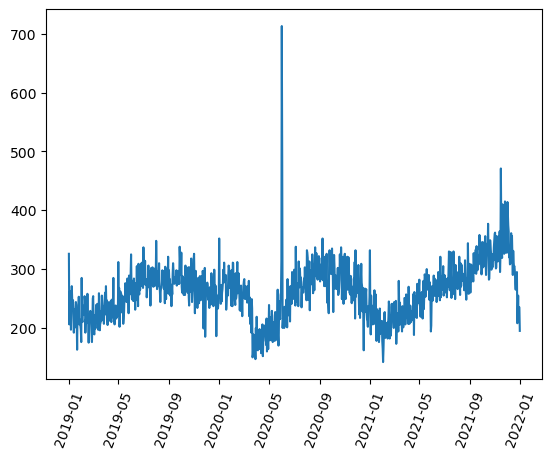

In [26]:
# plot as a time series
plt.plot(DF_NYPD_Daily['CMPLNT_FR_DT'], DF_NYPD_Daily['CMPLNT_NUM'])
plt.xticks(rotation=70);
plt.show()

In [27]:
print(DF_NYPD_Daily[DF_NYPD_Daily['CMPLNT_NUM']==713])

    CMPLNT_FR_DT  CMPLNT_NUM
517   2020-06-01         713


### 2. plotting on borough and zip code level normalized by population

In [28]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile

ZIP_POP = zips[['COUNTY', 'POPULATION']].groupby('COUNTY').sum().reset_index()
DF_NYPD_boro = DF_NYPD[['BORO_NM','CMPLNT_NUM']].groupby('BORO_NM').count().reset_index()
DF_NYB_ZIP = pd.merge(DF_NYPD_boro,ZIP_POP,left_index = True, right_index= True)
DF_NYB_ZIP['CRIME/100000'] = (DF_NYB_ZIP['CMPLNT_NUM']/DF_NYB_ZIP['POPULATION'])*100000
DF_NYB_ZIP.head()

,BORO_NM,CMPLNT_NUM,COUNTY,POPULATION,CRIME/100000
0,BRONX,62295,Bronx,1431301.0,4352.333995
1,BROOKLYN,80816,Kings,2548896.0,3170.627597
2,MANHATTAN,77449,New York,1687421.0,4589.785240
3,QUEENS,59173,Queens,2262768.0,2615.071452
4,STATEN ISLAND,7279,Richmond,468220.0,1554.611080


Text(0, 0.5, 'Crimes per 100000')

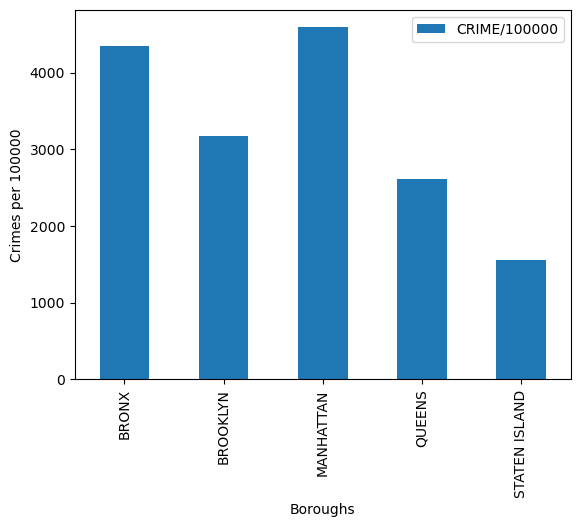

In [29]:
# plot as a bar plot
DF_NYB_ZIP.plot(x= 'BORO_NM', y= 'CRIME/100000', kind = 'bar')
plt.xlabel('Boroughs')
plt.ylabel('Crimes per 100000')

In [30]:
# now group by zip codes, normalize by their population
ZIP_ZIP = zips[['ZIPCODE', 'POPULATION']].groupby('ZIPCODE').sum().reset_index()
DF_NYPD_ZIP = DF_NYPD[['ZIPCODE','CMPLNT_NUM']].groupby('ZIPCODE').count().reset_index()
DF_NYZ_ZIP = pd.merge(DF_NYPD_ZIP,ZIP_ZIP,on ='ZIPCODE')
DF_NYZ_ZIP['CRIME/100000'] = (DF_NYZ_ZIP['CMPLNT_NUM']/DF_NYZ_ZIP['POPULATION'])*100000
DF_NYZ_ZIP.head()

,ZIPCODE,CMPLNT_NUM,POPULATION,CRIME/100000
0,00083,196,25.0,784000.000000
1,10001,4322,22413.0,19283.451568
2,10002,3703,81305.0,4554.455446
3,10003,3095,55878.0,5538.852500
4,10004,251,8748.0,2869.227252


<AxesSubplot:>

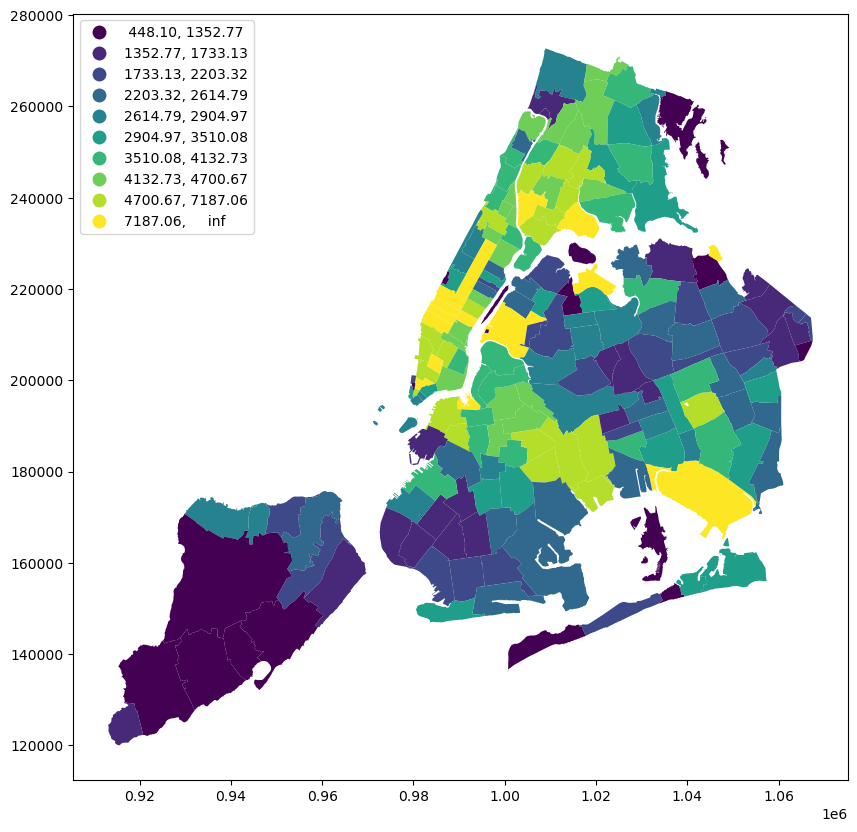

In [31]:
# plot as a heatmap with quantiles color scheme
ZIP_VIZ = zips.merge(DF_NYZ_ZIP, left_on = 'ZIPCODE', right_on = 'ZIPCODE')
fig, ax = plt.subplots(1, figsize=(10,10))

ZIP_VIZ.plot(ax=ax, column='CRIME/100000', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})


### 3. bar plots of total type 1 crimes vs a) months b) day of week and c) hour of day

In [32]:
# code here
DF_2['CMPLNT_FR_TM'] = pd.to_datetime(DF_2['CMPLNT_FR_TM'],errors= 'coerce')
DF_2['Month'] = DF_2['CMPLNT_FR_DT'].dt.month
DF_2['DOW'] = DF_2['CMPLNT_FR_DT'].dt.dayofweek
DF_2['Hour'] = DF_2['CMPLNT_FR_TM'].dt.hour
DF_2.head()


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,Year,geometry,Month,DOW,Hour
681150,123171799,2021-12-31,2022-10-23 21:15:00,FELONY ASSAULT,BRONX,NaN,40.817877,-73.865994,2021,POINT (-73.86599 40.81788),12,4,21
681170,725872999,2021-12-21,2022-10-23 23:00:00,ARSON,BRONX,NaN,40.859744,-73.826259,2021,POINT (-73.82626 40.85974),12,1,23
681210,195931501,2019-12-30,2022-10-23 19:20:00,GRAND LARCENY,MANHATTAN,NaN,40.759428,-73.973467,2019,POINT (-73.97347 40.75943),12,0,19
681252,696904327,2019-12-29,2022-10-23 13:15:00,GRAND LARCENY OF MOTOR VEHICLE,BROOKLYN,NaN,40.674397,-73.951466,2019,POINT (-73.95147 40.67440),12,6,13
681332,730604096,2021-12-26,2022-10-23 12:00:00,GRAND LARCENY,BRONX,NaN,40.824075,-73.908711,2021,POINT (-73.90871 40.82407),12,6,12


Text(0, 0.5, 'Crimes')

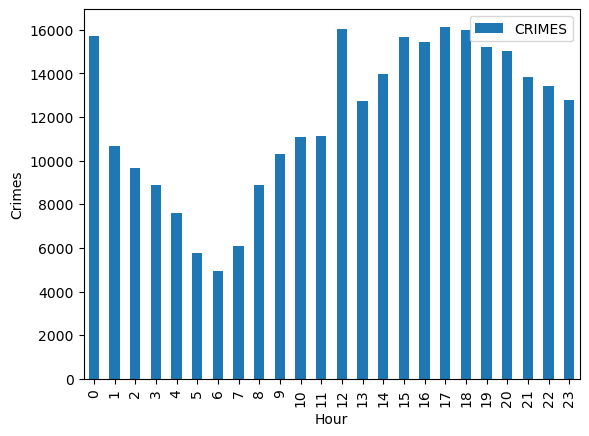

In [33]:
data_mid_hr = DF_2.groupby(['Hour']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'CRIMES'}).reset_index()
data_mid_hr.plot(x= 'Hour', y= 'CRIMES', kind = 'bar')
plt.xlabel('Hour')
plt.ylabel('Crimes')

Text(0, 0.5, 'Crimes')

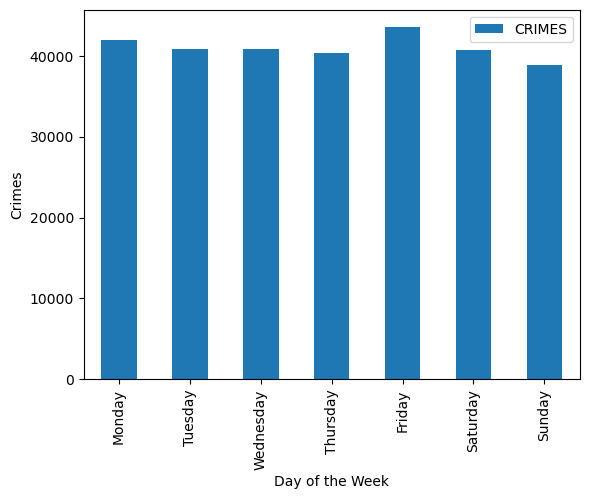

In [34]:
data_mid_DOW = DF_2.groupby(['DOW']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'CRIMES'}).reset_index()
data_mid_DOW['DOW'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace = True)
data_mid_DOW.plot(x= 'DOW', y= 'CRIMES', kind = 'bar')
plt.xlabel('Day of the Week')
plt.ylabel('Crimes')

Text(0, 0.5, 'Crimes')

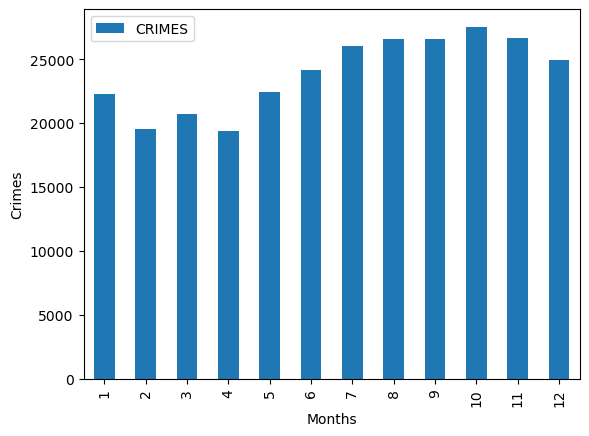

In [35]:
data_mid_month = DF_2.groupby(['Month']).\
            agg({'CMPLNT_NUM':'count'}).\
            rename(columns={'CMPLNT_NUM':'CRIMES'}).reset_index()
data_mid_month.plot(x= 'Month', y= 'CRIMES', kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Crimes')

### 4. Bar plots: Felony assault vs grand larceny grouped by a) day of week and b) hour of day

In [36]:
# filter data for above crime types
DF_2C = DF_2[DF_2['OFNS_DESC'].isin(['FELONY ASSAULT','GRAND LARCENY'])]
print(DF_2C.shape)
print(DF_2C['OFNS_DESC'].unique())

(178519, 13)
['FELONY ASSAULT' 'GRAND LARCENY']


In [37]:
# group the numbers and normalize by total city population (per 100,000)

DF_2CC = DF_2C[['OFNS_DESC','CMPLNT_NUM','DOW']].groupby(['DOW','OFNS_DESC']).count().reset_index()
DF_2CC['CRIME/100000'] = (DF_2CC['CMPLNT_NUM']/zips['POPULATION'].sum())*100000
DF_2CC['DOW'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace = True)
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
DF_2CC =pd.pivot_table(DF_2CC, index='DOW', values=['CRIME/100000'], columns = ('OFNS_DESC')).loc[order]
DF_2CC

CRIME/100000              
OFNS_DESC FELONY ASSAULT GRAND LARCENY
DOW                                   
Monday        102.576547    208.617954
Tuesday        96.468390    203.736191
Wednesday     100.707189    203.962419
Thursday       98.754484    200.449932
Friday        105.946153    215.976318
Saturday      122.139317    179.541700
Sunday        123.306177    163.396164

In [38]:
DF_2CH = DF_2C[['OFNS_DESC','CMPLNT_NUM','Hour']].groupby(['Hour', 'OFNS_DESC']).count().reset_index()

DF_2CH['CRIME/100000'] = (DF_2CH['CMPLNT_NUM']/zips['POPULATION'].sum())*100000

DF_2CH = pd.pivot_table(DF_2CH, index='Hour', values=['CRIME/100000'], columns = 'OFNS_DESC')
DF_2CH

CRIME/100000              
OFNS_DESC FELONY ASSAULT GRAND LARCENY
Hour                                  
0              42.137945     77.096128
1              36.005975     31.302814
2              29.540617     28.361850
3              26.552025     23.932543
4              21.265434     19.205568
5              16.467018     14.919143
6              15.097744     15.800241
7              17.193329     27.671259
8              20.753444     51.663336
9              23.158605     65.427525
10             23.992077     69.070986
11             25.670927     67.034934
12             28.469010    114.459471
13             29.171508     76.667485
14             31.469508     81.382553
15             35.755934     89.252907
16             37.327623     82.489880
17             38.899313     83.609113
18             39.697064     80.108532
19             40.161427     70.928437
20             42.102225     63.701048
21             43.435780     52.603968
22             43.721541     45.852847
23             41.852184     43.138111

Text(0, 0.5, 'Crimes')

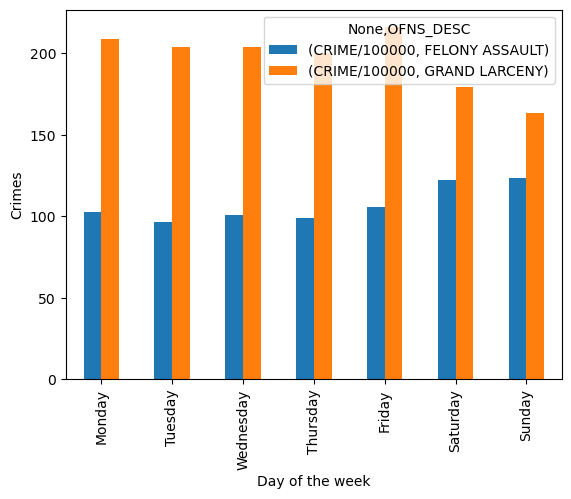

In [39]:

DF_2CC.plot.bar()
plt.xlabel('Day of the week')
plt.ylabel('Crimes')


Text(0, 0.5, 'Crimes')

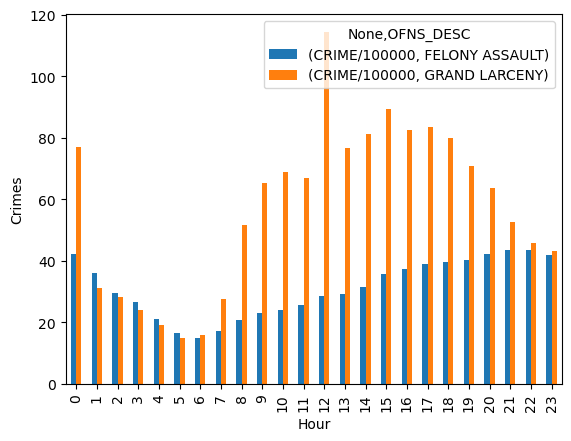

In [40]:
# plot two bar plots: one for day of week and other for hour of day
# each plot should have comparison of the two type of crime numbers (normalized) by weekday and hour respectively
DF_2CH.plot.bar()
plt.xlabel('Hour')
plt.ylabel('Crimes')


### 5. comparing the %% decomposition of type 1 crimes by category of crime

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

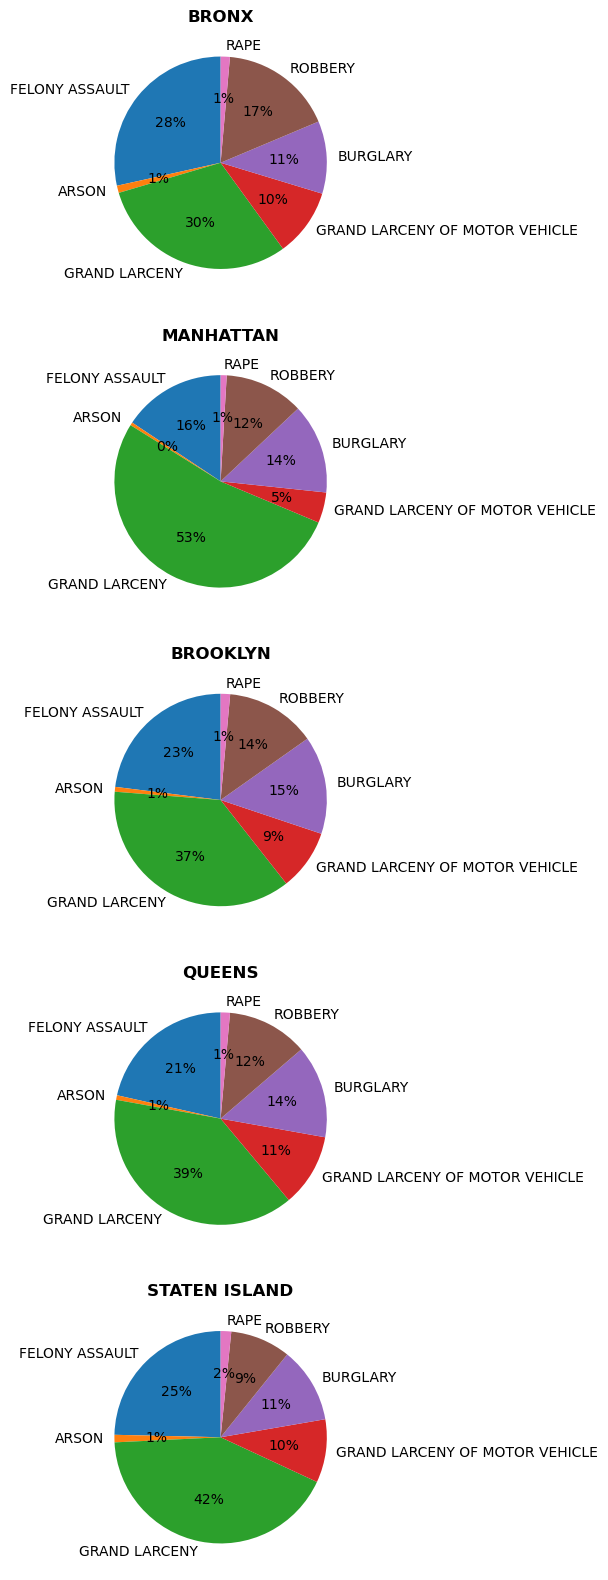

In [41]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes

##for boro in DF_2.BORO_NM.unique():
fig1, axs = plt.subplots(5,1, figsize = (20,20))
labels = DF_2['OFNS_DESC'].unique()
for n,boro in enumerate (DF_2.BORO_NM.unique()):
    sizes=[]
    Boro_T = DF_2[DF_2['BORO_NM']== boro]
    for i in labels:
        sizes.append((len(Boro_T[Boro_T['OFNS_DESC']==i])/len(Boro_T)))
    axs[n].pie(sizes, labels = labels, autopct = '%1.0f%%', shadow = False, startangle =90)
    axs[n].set_title(boro, fontweight = 'bold')
                                    
    
    # complete this code here

## Section 3 - Hypothesis testing tasks

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

### 1. plotting distributions and normality test

In [42]:
#introduce the function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

In [43]:
# group type 1 crime numbers per day for 2019
DF_NYPD['Date'] = DF_NYPD['CMPLNT_FR_DT'].dt.date
DF_NYPD['Year'] = DF_NYPD['CMPLNT_FR_DT'].dt.year
DF_CRIME = DF_NYPD.loc[DF_NYPD['Year']==2019]
DF_CRIME1 = DF_CRIME.groupby(['Date']).agg({'CMPLNT_NUM':'count'})
DF_CRIME1.head()

,CMPLNT_NUM
Date,
2019-01-01,326
2019-01-02,206
2019-01-03,261
2019-01-04,263
2019-01-05,230


Mean = 256.46
Standard deviation = 33.06
1 percentile = 181.76
5 percentile = 201.20
25 percentile = 234.00
50 percentile = 260.00
75 percentile = 280.00
95 percentile = 306.00
99 percentile = 326.72


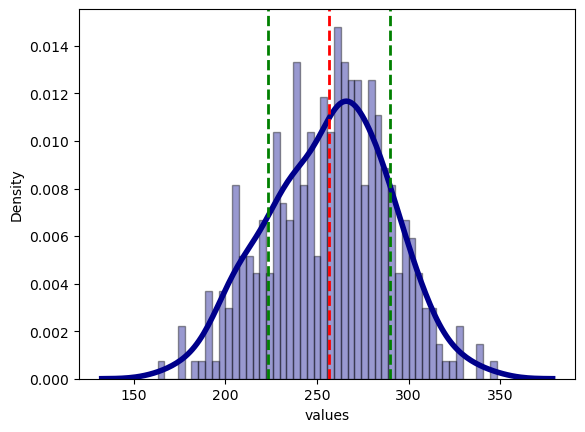

In [44]:
# plot the distribution (density plot)
distribution_analysis(DF_CRIME1.CMPLNT_NUM);

In [45]:
# normality test
def is_normal(x):
    return stats.kstest(x,'norm',args=(x.mean(),x.std()))
is_normal(DF_CRIME1)


KstestResult(statistic=0.9976519119345821, pvalue=0.0)

we can reject the null hypothesis with 99% confidence level

### 2. weekdays vs weekend distribution

In [46]:
# create dataframes for weekdays and weekends
DF_NYPD['DOW'] = DF_NYPD['CMPLNT_FR_DT'].dt.dayofweek
DF_NYPD['DOW'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace = True)
DF_WD = DF_NYPD.loc[DF_NYPD['DOW'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]
DF_WE = DF_NYPD.loc[DF_NYPD['DOW'].isin(['Saturday','Sunday'])]

In [47]:
# group daily numbers for weekdays and weekends
DF_WD= DF_WD.groupby(['CMPLNT_FR_DT']).agg({'CMPLNT_NUM':'count'}).reset_index()
DF_WE= DF_WE.groupby(['CMPLNT_FR_DT']).agg({'CMPLNT_NUM':'count'}).reset_index()

In [48]:
DF_WD['CRIME_PERPOP'] = (DF_WD['CMPLNT_NUM']/zips['POPULATION'].sum())*100000
DF_WE['CRIME_PERPOP'] = (DF_WE['CMPLNT_NUM']/zips['POPULATION'].sum())*100000

Mean = 3.15
Standard deviation = 0.56
1 percentile = 1.95
5 percentile = 2.31
25 percentile = 2.79
50 percentile = 3.16
75 percentile = 3.46
95 percentile = 3.99
99 percentile = 4.62


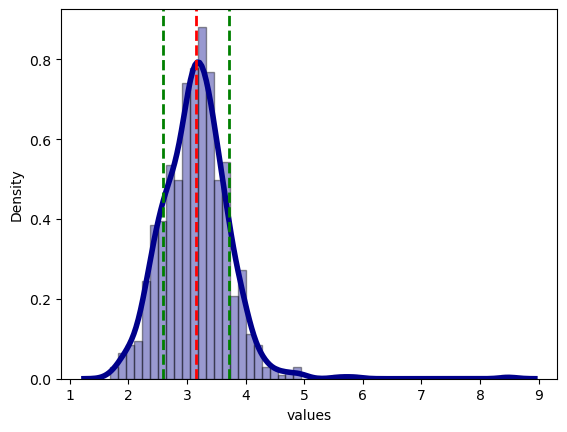

Mean = 3.04
Standard deviation = 0.52
1 percentile = 1.91
5 percentile = 2.15
25 percentile = 2.68
50 percentile = 3.08
75 percentile = 3.38
95 percentile = 3.88
99 percentile = 4.28


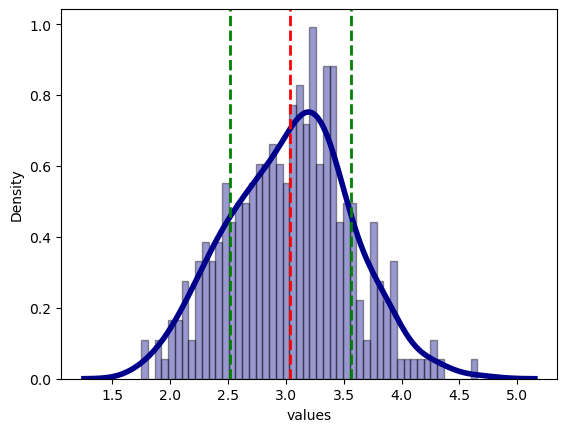

In [49]:
# plot distribution (density plot)
distribution_analysis(DF_WD.CRIME_PERPOP);
distribution_analysis(DF_WE.CRIME_PERPOP);

In [50]:
# t-test
stats.ttest_ind(DF_WD['CRIME_PERPOP'].values,DF_WE['CRIME_PERPOP'].values)

Ttest_indResult(statistic=3.0254026055921317, pvalue=0.0025410178394694167)

In [51]:
# k-s test
stats.ks_2samp(DF_WD['CRIME_PERPOP'],DF_WE['CRIME_PERPOP'])

KstestResult(statistic=0.08634222919937205, pvalue=0.06684333053927285)

The hypothesis that the average daily crime rate on weekends and weekdays is the same can be rejected with 10% significance 
and their distributions are equal can also be rejected at 10% significance
